In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import os


In [16]:
import numpy as np
import deepxde as dde

# Define the geometry and time domain
geom = dde.geometry.Rectangle([-1, -1], [1, 1])
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Define the PDE
def pde(x, u):
    du_x = dde.grad.jacobian(u, x, i=0, j=0)
    du_y = dde.grad.jacobian(u, x, i=0, j=1)
    du_t = dde.grad.jacobian(u, x, i=0, j=2)
    mu = 0.1
    return du_t + mu * (du_x + du_y)

# Define the boundary conditions
bc = dde.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)

# Define the initial conditions
ic = dde.IC(geomtime, lambda x:np.exp(-100 * (x[:, 0:1] - 0.2)**2) * np.exp(-100 * (x[:, 1:2] - 0.2)**2) , lambda _, on_initial: on_initial)

# Define the model
data = dde.data.TimePDE(geomtime, pde, [bc, ic], num_domain=400, num_boundary=200, num_initial=100)
net = dde.maps.FNN([3] + [20] * 3 + [2], "tanh", "Glorot normal")
model = dde.Model(data, net)

# Train the model
model.compile("adam", lr=0.001)
model.train(epochs=5000)

Compiling model...
'compile' took 0.000763 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.67e-01, 1.22e-01, 4.60e-02]    [1.67e-01, 1.22e-01, 4.60e-02]    []  
1000      [1.91e-05, 2.19e-05, 3.20e-03]    [1.91e-05, 2.19e-05, 3.20e-03]    []  
2000      [1.34e-05, 2.10e-05, 3.15e-03]    [1.34e-05, 2.10e-05, 3.15e-03]    []  
3000      [1.47e-05, 2.46e-05, 3.03e-03]    [1.47e-05, 2.46e-05, 3.03e-03]    []  
4000      [2.42e-05, 5.13e-05, 2.47e-03]    [2.42e-05, 5.13e-05, 2.47e-03]    []  
5000      [2.23e-05, 4.27e-05, 2.76e-04]    [2.23e-05, 4.27e-05, 2.76e-04]    []  

Best model at step 5000:
  train loss: 3.41e-04
  test loss: 3.41e-04
  test metric: []

'train' took 12.964764 s



(<deepxde.model.LossHistory at 0x7f43be40ce20>,
 <deepxde.model.TrainState at 0x7f43c15d2160>)

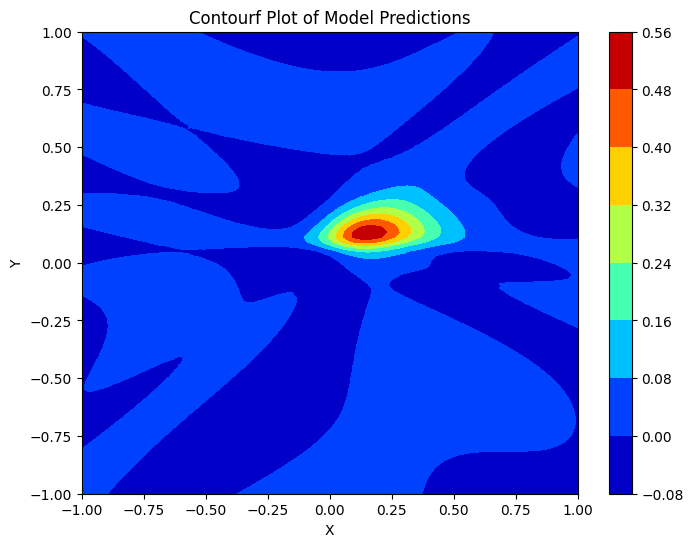

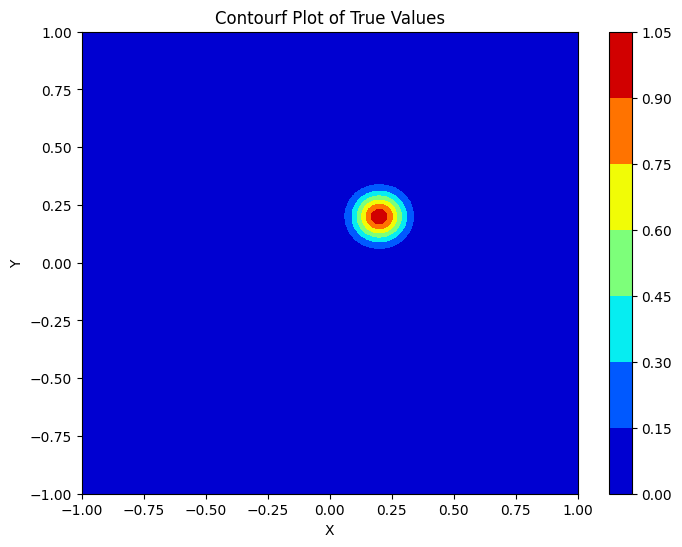

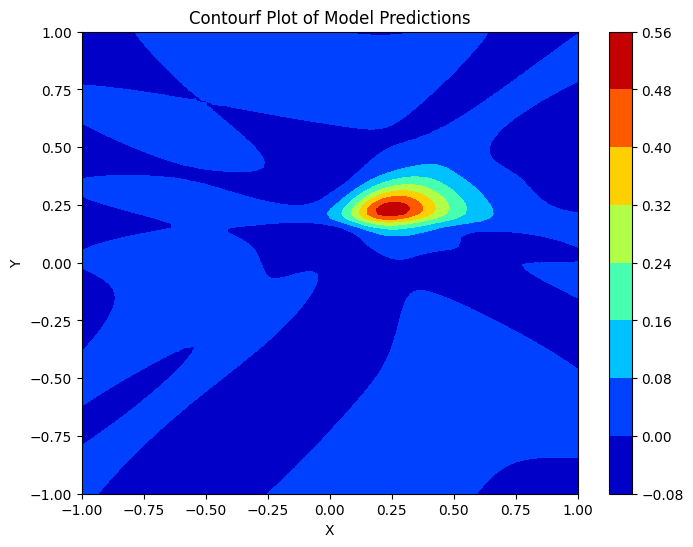

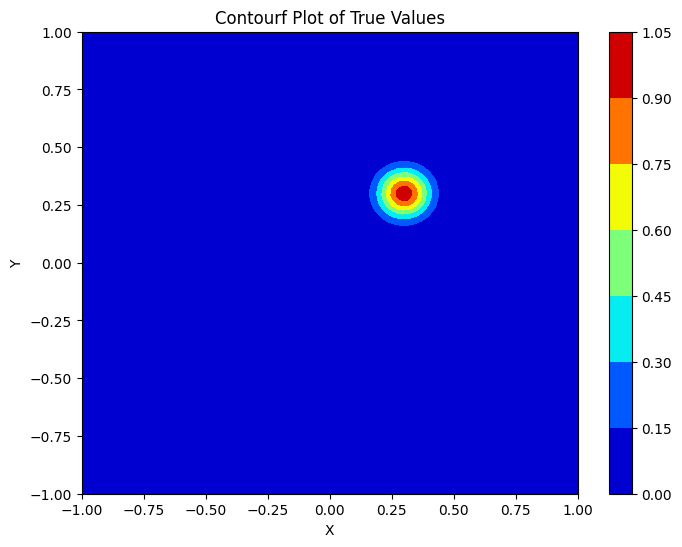

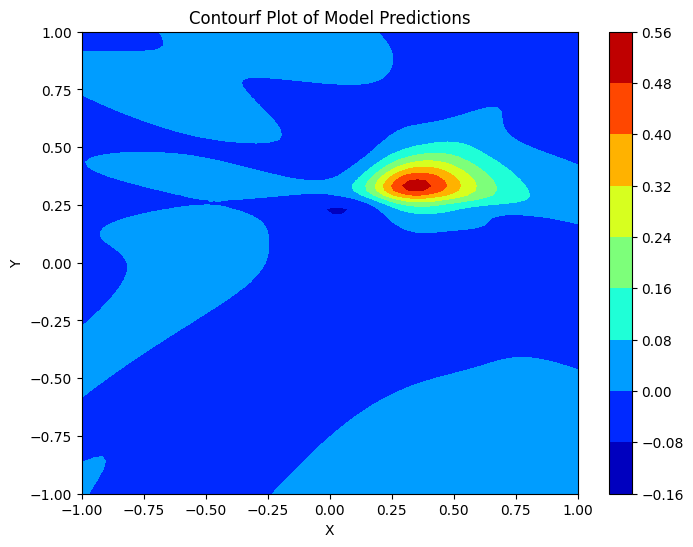

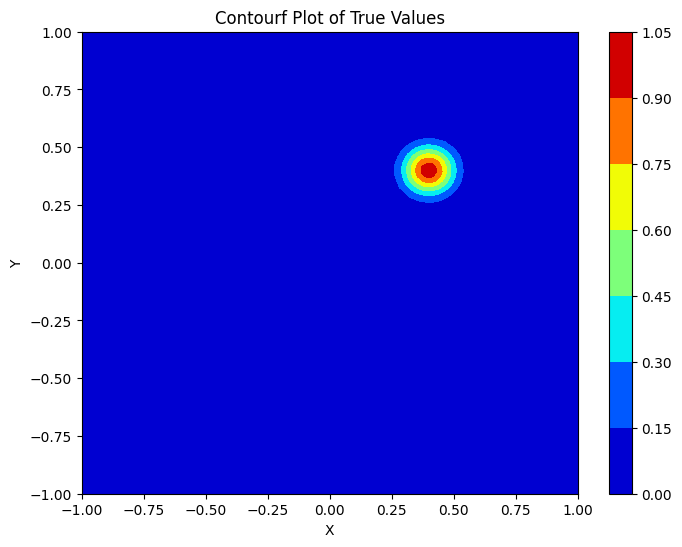

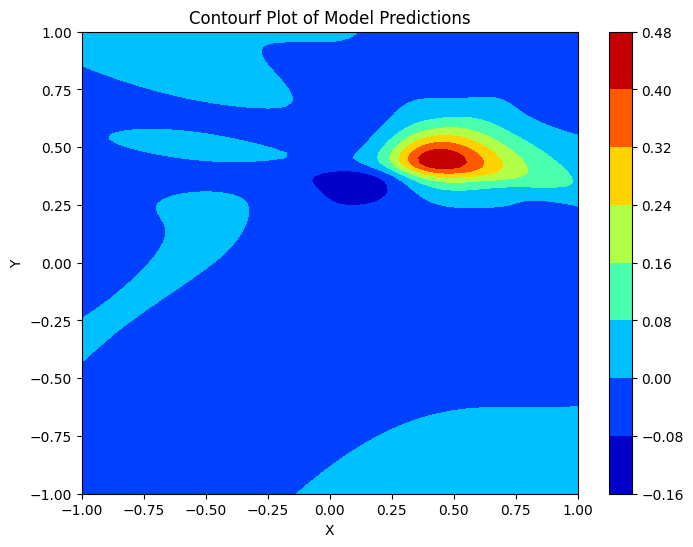

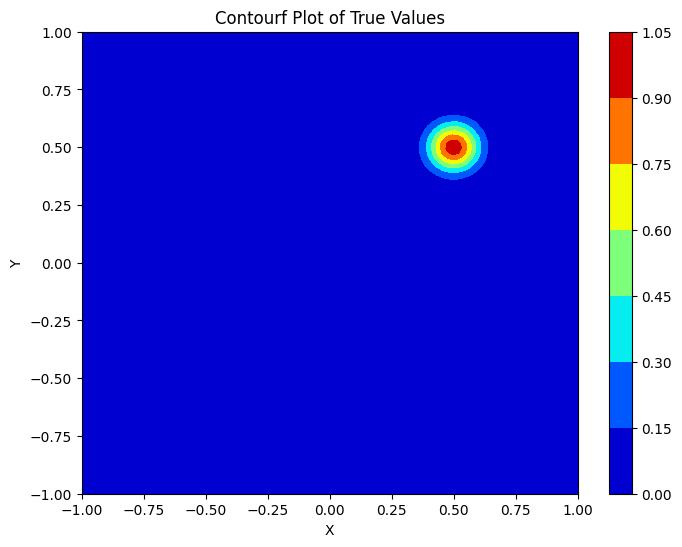

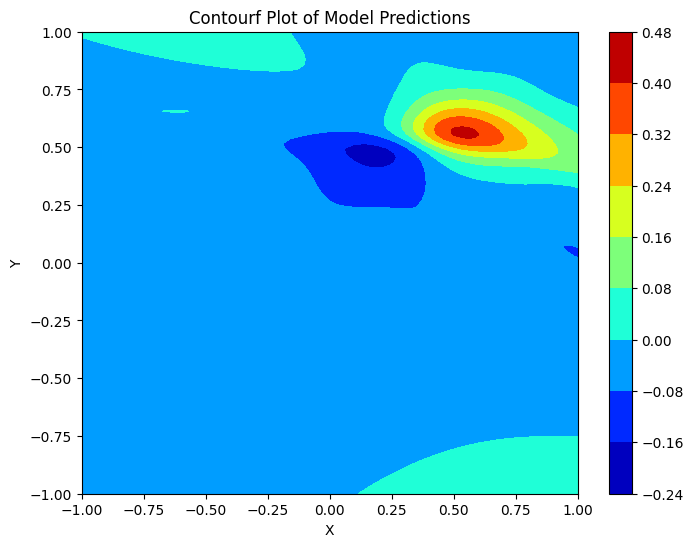

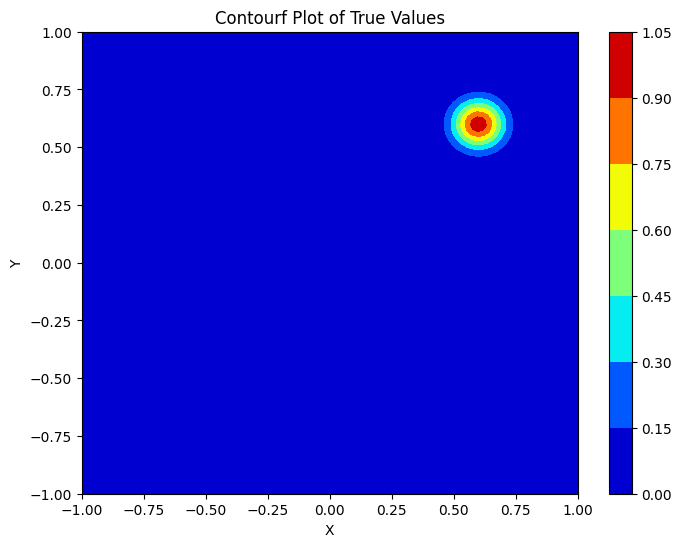

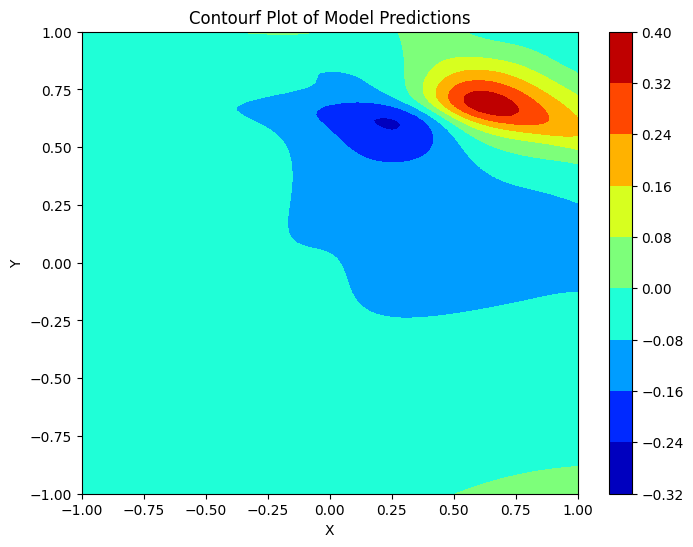

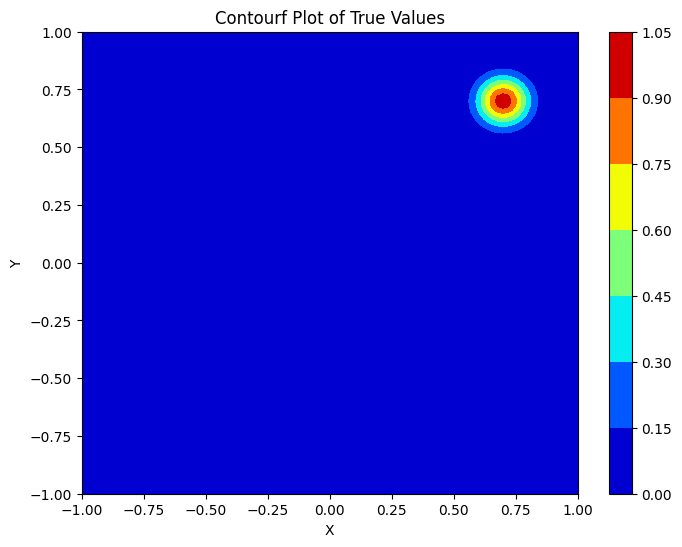

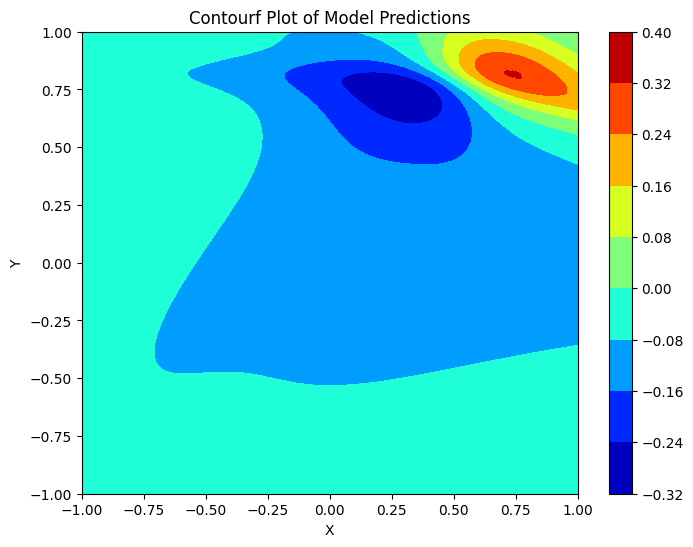

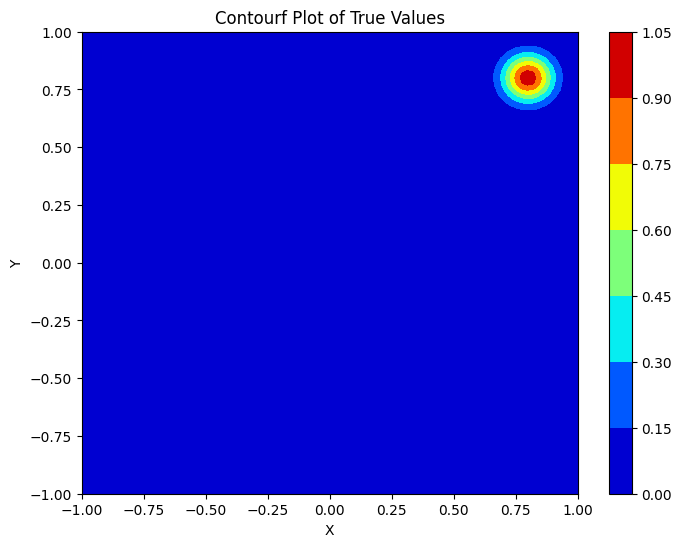

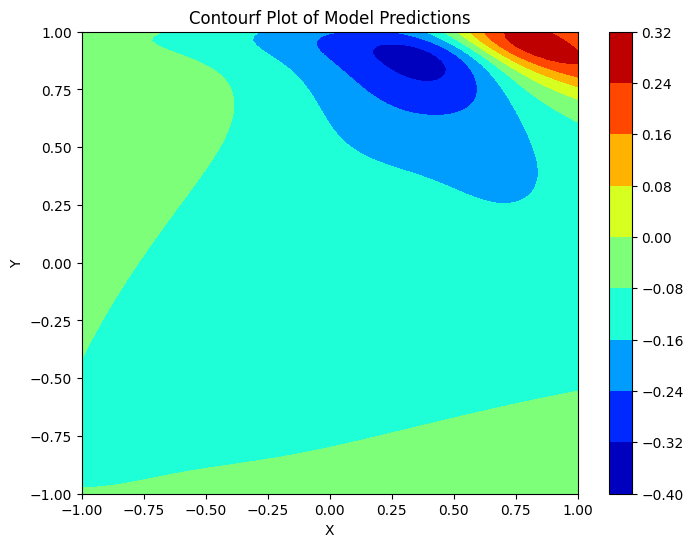

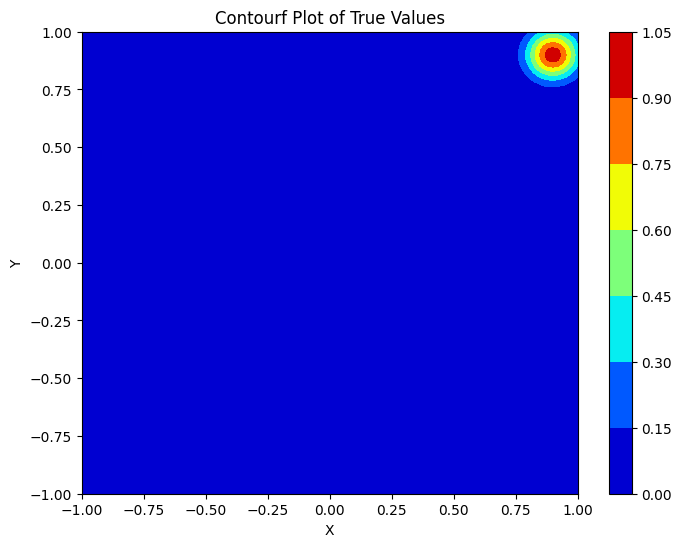

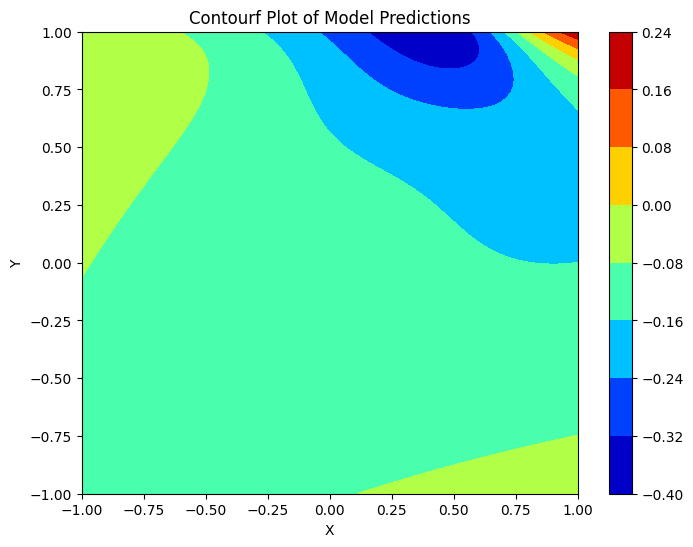

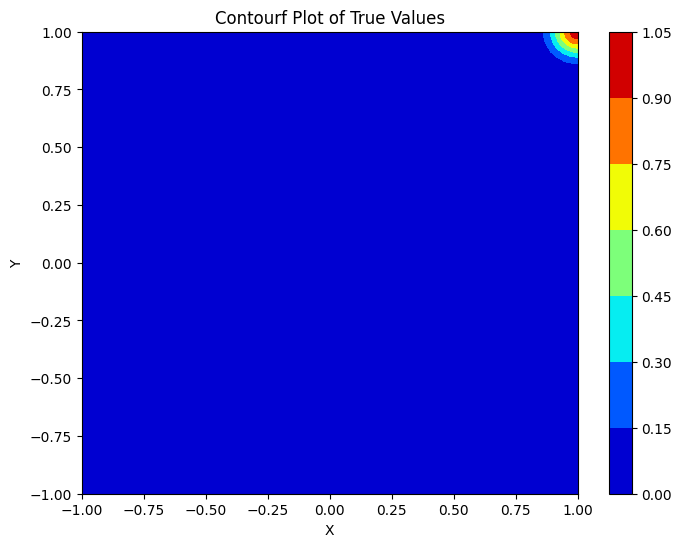

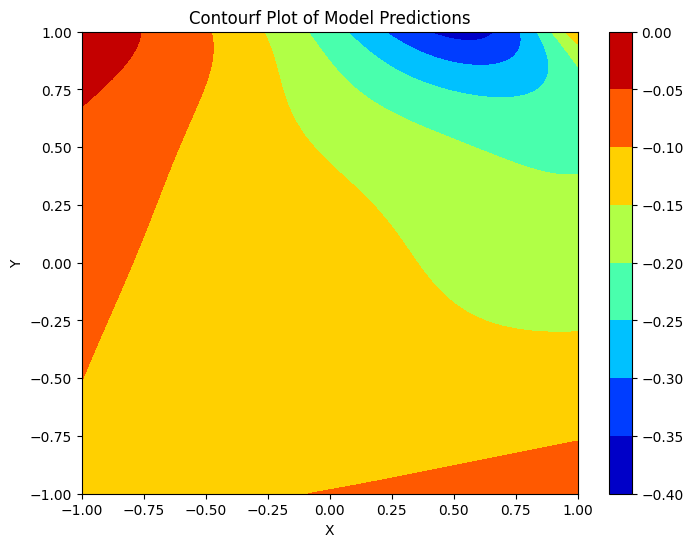

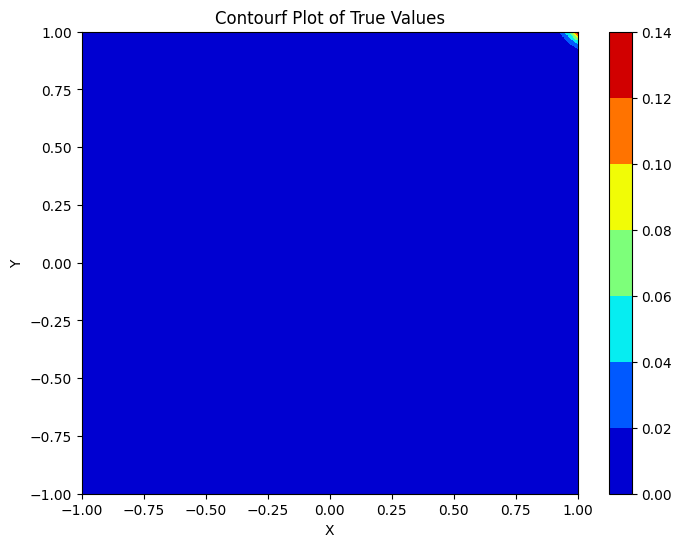

In [17]:
# Test the model
x_test = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x_test = np.vstack((x_test[0].flatten(), x_test[1].flatten(), np.ones_like(x_test[0].flatten()))).T

for  i in range(10):
    x_test[:,2] = i
    # Predict using the model
    y_pred = model.predict(x_test)

    y_true = np.exp(-100 * (x_test[:, 0] - 0.2 - 0.1 * i)**2) * np.exp(-100 * (x_test[:, 1] - 0.2 - 0.1 * i)**2)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.tricontourf(x_test[:, 0], x_test[:, 1], y_pred[:, 0], cmap=cm.jet)
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contourf Plot of Model Predictions')
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.tricontourf(x_test[:, 0], x_test[:, 1], y_true, cmap=cm.jet)
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contourf Plot of True Values')
    plt.show()
